In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Lab/genderGuess'
!ls

/content/drive/MyDrive/Lab/genderGuess
boys.csv  genderGuess.pdf  Gender.ipynb  girls.csv


In [57]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [58]:
data_boys = pd.read_csv("boys.csv", names = ['Name'])
data_boys['Gender'] = 1
data_girls = pd.read_csv("girls.csv", names = ['Name'])
data_girls['Gender'] = 0

data = pd.concat([data_boys, data_girls])
data.head()

,Name,Gender
0,An Cơ,1
1,An Khang,1
2,Ân Lai,1
3,An Nam,1
4,An Nguyên,1


In [20]:
data.info()
data['Gender'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2536 entries, 0 to 1310
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    2536 non-null   object
 1   Gender  2536 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 59.4+ KB


array([1, 0])

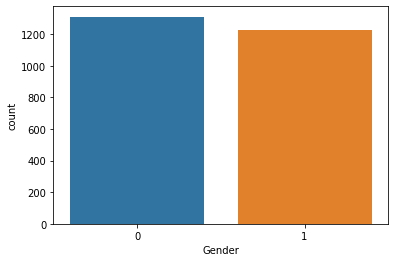

In [29]:
import seaborn as sns
sns.countplot(x= data['Gender'])

In [59]:
cv = CountVectorizer()
X = cv.fit_transform(data['Name'].astype('str'))
y = data['Gender'].values.astype(int)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
model1 = MultinomialNB()
model1.fit(X_train, y_train)

model2 = BernoulliNB()
model2.fit(X_train.todense(), y_train)

model3 = LogisticRegression()
model3.fit(X_train, y_train)

model4 = SVC()
model4.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


SVC()

In [65]:
y_predict1 = model1.predict(X_test)
y_predict2 = model2.predict(X_test.todense())
y_predict3 = model3.predict(X_test)
y_predict4 = model4.predict(X_test)
print('y_test: ' ,y_test)

'''
print('MultinomialNB y_predict: ' ,y_predict1)
print('GaussianNB y_predict: ' ,y_predict2)
print('BernoulliNB y_predict: ' ,y_predict3)
print('SVM y_predict', y_predict4)'''

#Evaluation
print('Evaluation')

accuracy1 = accuracy_score(y_test, y_predict1)
accuracy2 = accuracy_score(y_test, y_predict2)
accuracy3 = accuracy_score(y_test, y_predict3)
accuracy4 = accuracy_score(y_test, y_predict4)
print('MultinomialNB accuracy: ', accuracy1)
print('BernoulliNB accuracy: ', accuracy2)
print('LR accuracy: ', accuracy3)
print('SVM accuracy: ', accuracy4)

precision1 = precision_score(y_test, y_predict1, pos_label=0)
precision2 = precision_score(y_test, y_predict2, pos_label=0)
precision3 = precision_score(y_test, y_predict3, pos_label=0)
precision4 = precision_score(y_test, y_predict4, pos_label=0)
print('MultinomialNB precision: ', precision1)
print('BernoulliNB precision: ', precision2)
print('LR precision: ', precision3)
print('SVM precision: ', precision4)

recall1 = recall_score(y_test, y_predict1, pos_label=0)
recall2 = recall_score(y_test, y_predict2, pos_label=0)
recall3 = recall_score(y_test, y_predict3, pos_label=0)
recall4 = recall_score(y_test, y_predict4, pos_label=0)
print('MultinomialNB recall: ', recall1)
print('BernoulliNB recall: ', recall2)
print('LR recall: ', recall3)
print('SVM recall: ', recall4)

f1_1 = f1_score(y_test, y_predict1, pos_label=0)
f1_2 = f1_score(y_test, y_predict2, pos_label=0)
f1_3 = f1_score(y_test, y_predict3, pos_label=0)
f1_4 = f1_score(y_test, y_predict4, pos_label=0)
print('MultinomialNB f1 score: ', f1_1)
print('BernoulliNB f1 score: ', f1_2)
print('LR f1 score: ',f1_3)
print('SVM f1 score: ',f1_4)

matrix1 = confusion_matrix(y_test, y_predict1)
matrix2 = confusion_matrix(y_test, y_predict2)
matrix3 = confusion_matrix(y_test, y_predict3)
matrix4 = confusion_matrix(y_test, y_predict4)
print('MultinomialNB:')
print(matrix1)
print('BernoulliNB:')
print(matrix2)
print('LR:')
print(matrix3)
print('SVM:')
print(matrix4)

y_test:  [1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1
 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1
 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1
 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1
 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1
 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1
 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 0 0 0 1 0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
